# Visualizing Earnings Based On College Majors

### About project
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.
<br> 
__ Here are some of the columns in the dataset: __

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
import pandas as pd, matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

###### Read the dataset into a DataFrame and start exploring the data.



In [2]:
recent_grads=pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


###### Now we drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [6]:
raw_data_count=recent_grads.shape[0]
raw_data_count

173

In [7]:
recent_grads=recent_grads.dropna()

In [8]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Now we will visualize data to find relations between different columns of recent grads df

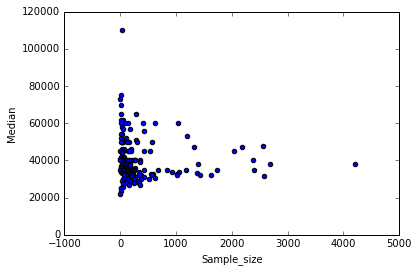

In [13]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

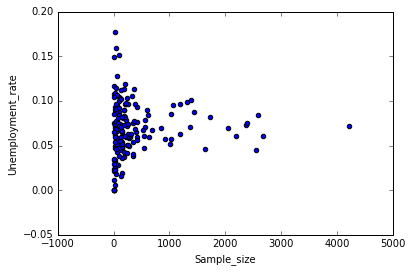

In [14]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

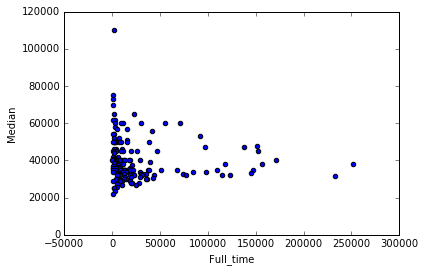

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

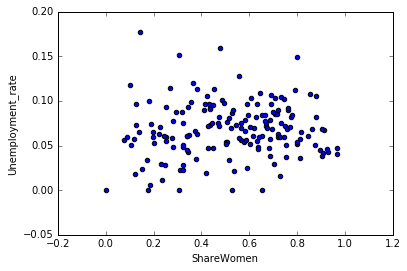

In [16]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

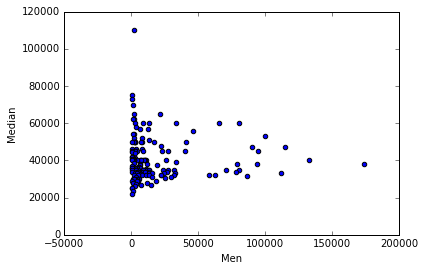

In [17]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

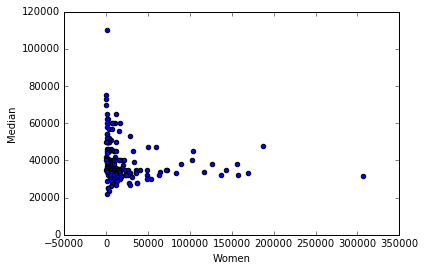

In [18]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

#### Observations:
__Do students in more popular majors make more money?__
<br>__Ans__ : Yes

<br>__Do students that majored in subjects that were majority female make more money?__
<br>__Ans__ : No

<br>__Is there any link between the number of full-time employees and median salary?__
<br>__Ans__ : No

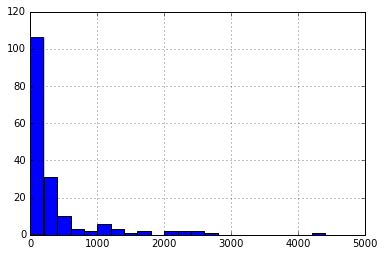

In [54]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

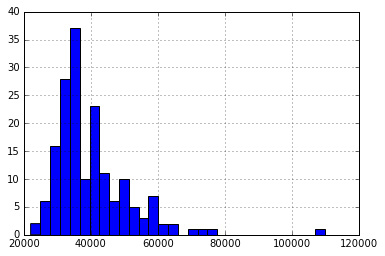

In [57]:
recent_grads['Median'].hist(bins=30)

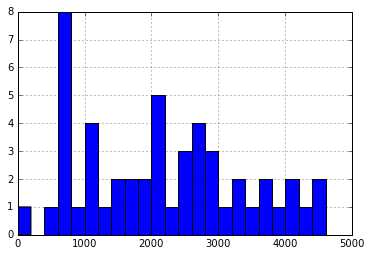

In [42]:
recent_grads['Employed'].hist(bins=25, range=(0,5000))

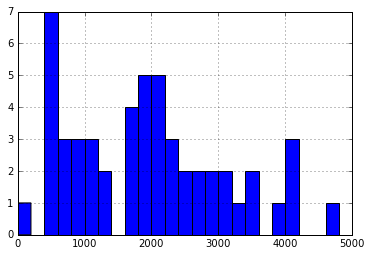

In [43]:
recent_grads['Full_time'].hist(bins=25, range=(0,5000))

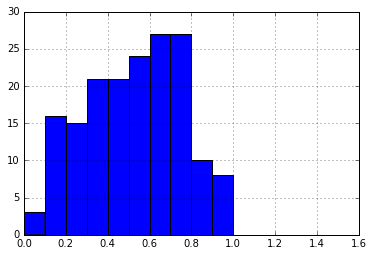

In [68]:
recent_grads['ShareWomen'].hist(bins=15, range=(0,1.5))

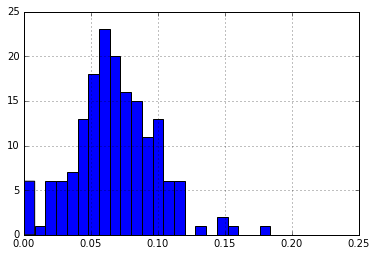

In [67]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.2))

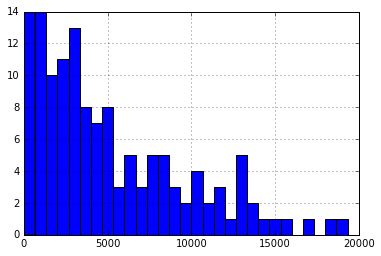

In [35]:
recent_grads['Men'].hist(bins=30, range=(0,20000))

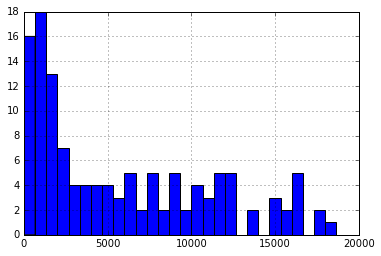

In [34]:
recent_grads['Women'].hist(bins=30, range=(0,20000))

###### Observations:
__What percent of majors are predominantly male? Predominantly female?__
<br>__Ans__ : 60%-40%

<br>__What's the most common median salary range?__
<br>__Ans__ : Around 40000

In [69]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eb913f470>,
      dtype=object)

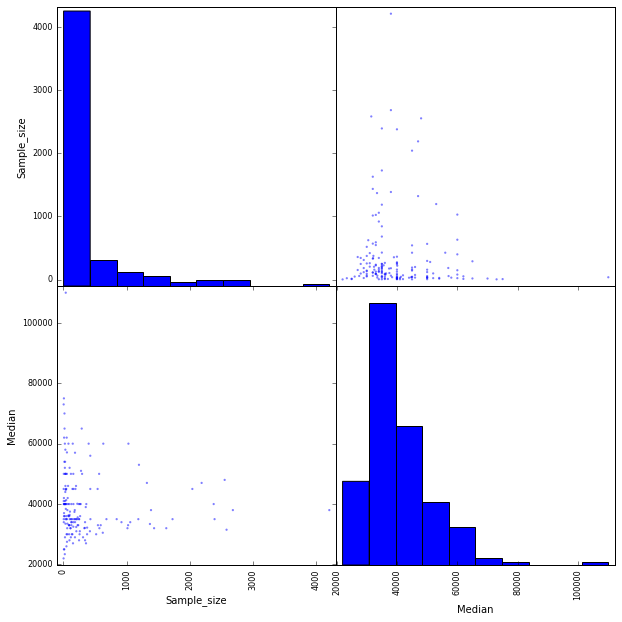

In [75]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eb8f6f160>,
      dtype=object)

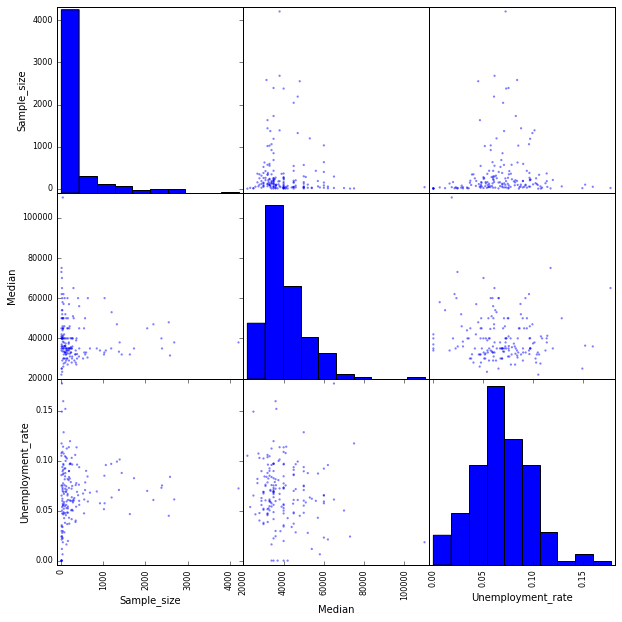

In [76]:
scatter_matrix(recent_grads[['Sample_size', 'Median',"Unemployment_rate"]], figsize=(10,10))

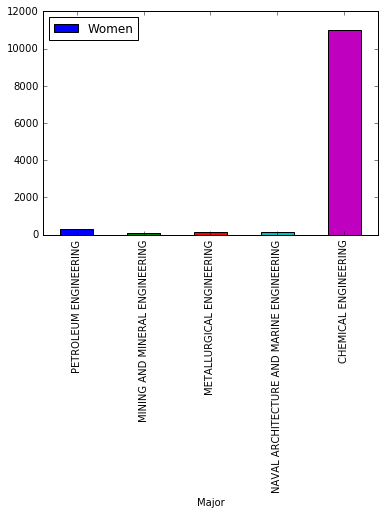

In [77]:
recent_grads[:5].plot.bar(x='Major', y='Women')

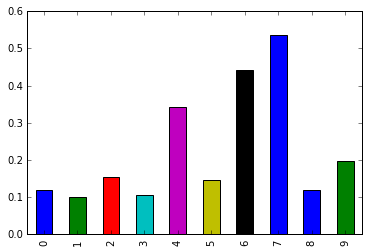

In [85]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

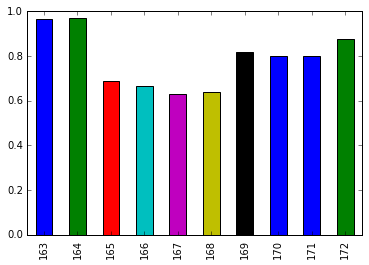

In [86]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar')

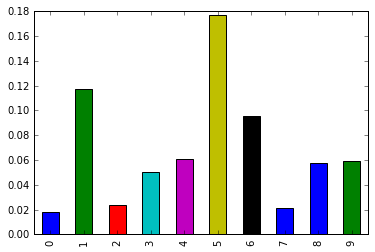

In [88]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

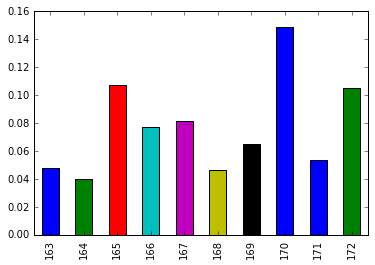

In [87]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')